### <font color='darkred'>IA Aplicado a Finanças</font>
### <font color='darkgreen'>Blockchain e IA Para Gestão de Empréstimos Pessoais – Clube do Empréstimo</font>
### <font color='darkblue'> Parte 1 - IA Para Gestão de Empréstimos Pessoais</font>

####  <font color='darkred'> Definindo um Sub-Problema </font>

Usando dados históricos sobre empréstimos do Lendig Club - incluindo informações sobre se o tomador do empréstimo pagou ou não o empréstimo - o principal objetivo deste trabalho será prever se um potencial mutuário provavelmente pagará o empréstimo.

**Fonte de dados: Kaggle** <br>
https://www.kaggle.com/datasets/wordsforthewise/lending-club

Após explorar e pré-processar os dados, vamos treinar um modelo de classificação binária de Rede Neural Artificial para atingir esse objetivo. Por fim, avaliamos o desempenho do modelo e simulamos seu funcionamento fazendo previsões com um novo tomador de empréstimo.

### <font color='darkred'>Instalando e Carregando Pacotes</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.simplefilter(action='ignore')

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

numpy     : 1.24.3
platform  : 1.0.8
matplotlib: 3.7.1
keras     : 3.6.0
tensorflow: 2.18.0
sklearn   : 1.3.0
pandas    : 1.5.3
seaborn   : 0.12.2



### <font color='darkred'> Carregando Dados</font>

In [5]:
# Carrega os dados
df_aprovado = pd.read_csv("dados/accepted_2007_to_2018Q4.csv")

In [6]:
# Info
df_aprovado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
# Shape
df_aprovado.shape

(2260701, 151)

In [8]:
# são 150 variaveis explicativas e 1 a ser explicado loan_status
# Amostra
df_aprovado.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='darkred'> Análise Exploratória </font>

In [9]:
# Total de registros por classe da variável de saída
df_aprovado.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [10]:
# Filtrando o dataframe
# Vamos trabalhar com apenas 2 classes: Pago ou em cobrança
df_aprovado = df_aprovado[df_aprovado.loan_status.isin(["Fully Paid" , "Charged Off"])]

In [11]:
# Total de registros por classe da variável de saída
df_aprovado.loan_status.value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [12]:
# Shape
df_aprovado.shape

(1345310, 151)

<Axes: xlabel='loan_status', ylabel='count'>

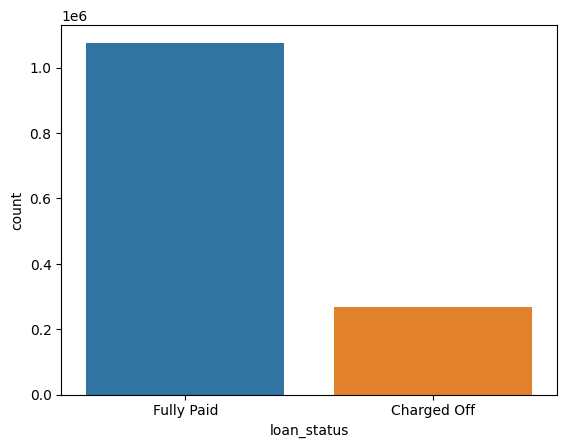

In [13]:
# Distribuição da Classe
sns.countplot(x = "loan_status" , data = df_aprovado)

### <font color='darkgreen'> Verificando Valores Ausentes </font>

Não pode deixar valor ausente para trabalhar com ML.

In [14]:
# Verificando valores nulos por colunas
df_aprovado.isnull().sum().sort_values(ascending = False)

next_pymnt_d                                  1345310
member_id                                     1345310
orig_projected_additional_accrued_interest    1341551
hardship_start_date                           1339556
hardship_length                               1339556
                                               ...   
pub_rec                                             0
open_acc                                            0
fico_range_high                                     0
fico_range_low                                      0
id                                                  0
Length: 151, dtype: int64

Há muitas colunas quase cheias de valores ausentes. Vamos verificar as primeiras 50 colunas classificadas por valores ausentes:

In [15]:
# Listando colunas com valores ausentes
df_aprovado.isnull().sum().sort_values(ascending = False).head(50)

next_pymnt_d                                  1345310
member_id                                     1345310
orig_projected_additional_accrued_interest    1341551
hardship_start_date                           1339556
hardship_length                               1339556
hardship_type                                 1339556
hardship_reason                               1339556
hardship_status                               1339556
deferral_term                                 1339556
hardship_amount                               1339556
hardship_end_date                             1339556
payment_plan_start_date                       1339556
hardship_dpd                                  1339556
hardship_loan_status                          1339556
hardship_payoff_balance_amount                1339556
hardship_last_payment_amount                  1339556
sec_app_mths_since_last_major_derog           1338665
sec_app_revol_util                            1327008
revol_bal_joint             

Regra de ouro: mais de 50% de valor nulo, dropa a coluna. Em casos com poucos dados, verificar procedimento

In [16]:
# Drop das colunas com mais valores ausentes
cols_to_drop = df_aprovado.isnull().sum().sort_values(ascending = False).head(50).index
df_aprovado = df_aprovado.drop(columns = cols_to_drop)

In [17]:
# Shape
df_aprovado.shape

(1345310, 101)

In [18]:
# 2ª Verificação de valores ausentes, depois do drop de colunas
df_aprovado.isnull().sum().sort_values(ascending = False).head(50)

total_bal_il                  807712
open_act_il                   807712
open_rv_12m                   807712
open_rv_24m                   807712
inq_fi                        807712
open_il_12m                   807712
open_il_24m                   807712
mths_since_last_delinq        678743
mths_since_recent_inq         174071
num_tl_120dpd_2m              117401
mo_sin_old_il_acct            105575
emp_title                      85785
emp_length                     78511
pct_tl_nvr_dlq                 67681
avg_cur_bal                    67549
mo_sin_rcnt_rev_tl_op          67528
num_rev_accts                  67528
mo_sin_old_rev_tl_op           67528
num_actv_rev_tl                67527
num_actv_bc_tl                 67527
num_il_tl                      67527
num_accts_ever_120_pd          67527
num_bc_tl                      67527
total_il_high_credit_limit     67527
num_rev_tl_bal_gt_0            67527
num_op_rev_tl                  67527
tot_cur_bal                    67527
t

In [19]:
# ainda há mtas colunas com Valores ausentes, vamos eliminar
cols_to_drop = df_aprovado.isnull().sum().sort_values(ascending = False).head(45).index
df_aprovado = df_aprovado.drop(columns = cols_to_drop)

In [20]:
# Shape
df_aprovado.shape

(1345310, 56)

In [21]:
# Para as colunas restantes com valores ausentes, vamos ver a porcentagem de valores ausentes:
nulls = df_aprovado.isnull().sum().sort_values(ascending = False)
nulls_percentage = (nulls/df_aprovado.shape[0]*100)
nulls_percentage.head(15)

last_pymnt_d                  0.171931
revol_util                    0.063703
pub_rec_bankruptcies          0.051810
dti                           0.027800
chargeoff_within_12_mths      0.004163
collections_12_mths_ex_med    0.004163
last_credit_pull_d            0.004088
tax_liens                     0.002899
inq_last_6mths                0.000074
zip_code                      0.000074
delinq_amnt                   0.000000
disbursement_method           0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
dtype: float64

As colunas restantes têm pontos de dados ausentes, mas representam menos de 0,2% do total de dados.
Vamos remover as linhas que não têm valores nessas colunas com dropna():

In [22]:
# Removendo registros com valores ausentes
# Agora estamos removendo as linhas inteiras, como o cunjunto de dados é suficientemente grande.
# poderiamos usar imputação, calculando a media ou mediana para imputar no VA.
df_aprovado = df_aprovado.dropna()

In [23]:
# Shape
df_aprovado.shape

(1341026, 56)

In [24]:
# Info
df_aprovado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341026 entries, 0 to 2260697
Data columns (total 56 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1341026 non-null  object 
 1   loan_amnt                   1341026 non-null  float64
 2   funded_amnt                 1341026 non-null  float64
 3   funded_amnt_inv             1341026 non-null  float64
 4   term                        1341026 non-null  object 
 5   int_rate                    1341026 non-null  float64
 6   installment                 1341026 non-null  float64
 7   grade                       1341026 non-null  object 
 8   sub_grade                   1341026 non-null  object 
 9   home_ownership              1341026 non-null  object 
 10  annual_inc                  1341026 non-null  float64
 11  verification_status         1341026 non-null  object 
 12  issue_d                     1341026 non-null  object 
 1

Vamos agora dar uma olhada no histograma loan_amnt, para ter uma ideia da distribuição do valor:

<Axes: xlabel='loan_amnt', ylabel='Count'>

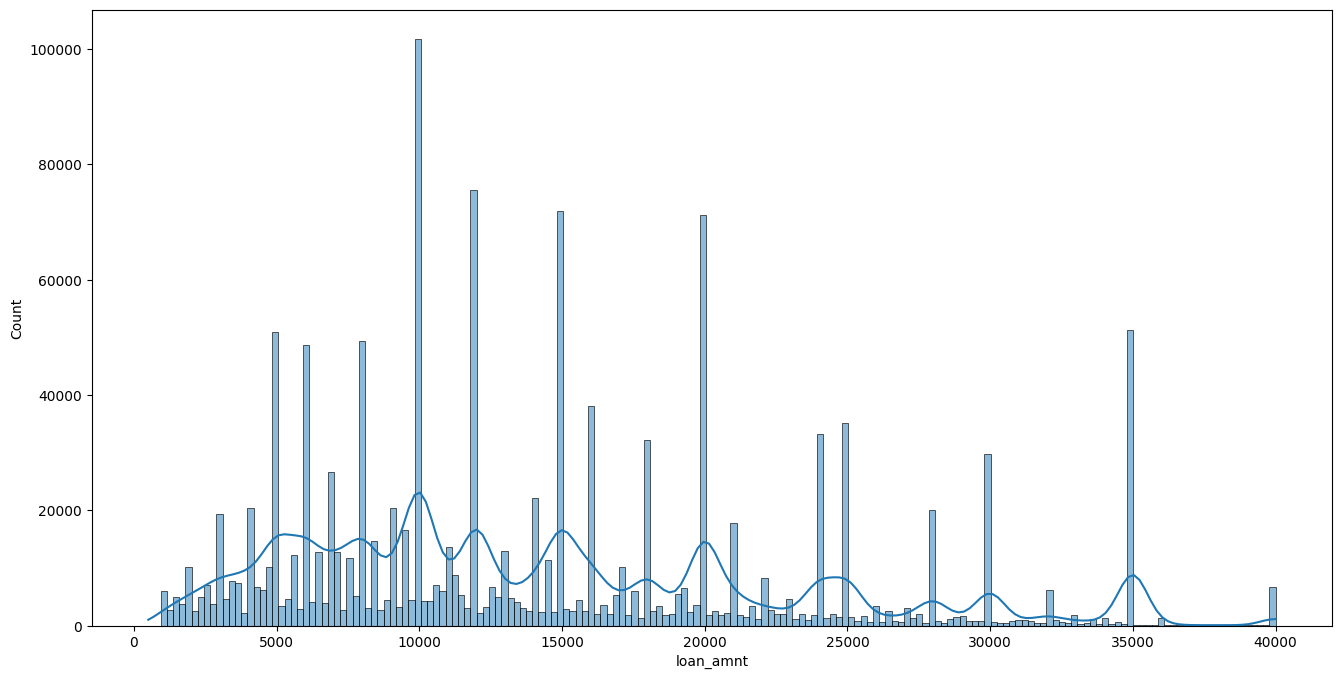

In [25]:
# Histograma com a variavel loan_amnt - loan amount
plt.figure(figsize = (16,8))
sns.histplot(df_aprovado.loan_amnt, kde = True)

Vamos agora ver a correlação entre variáveis contínuas:

Dependendo do resultado, precisam ser eliminadas para evitar multicolinearidade

<Axes: >

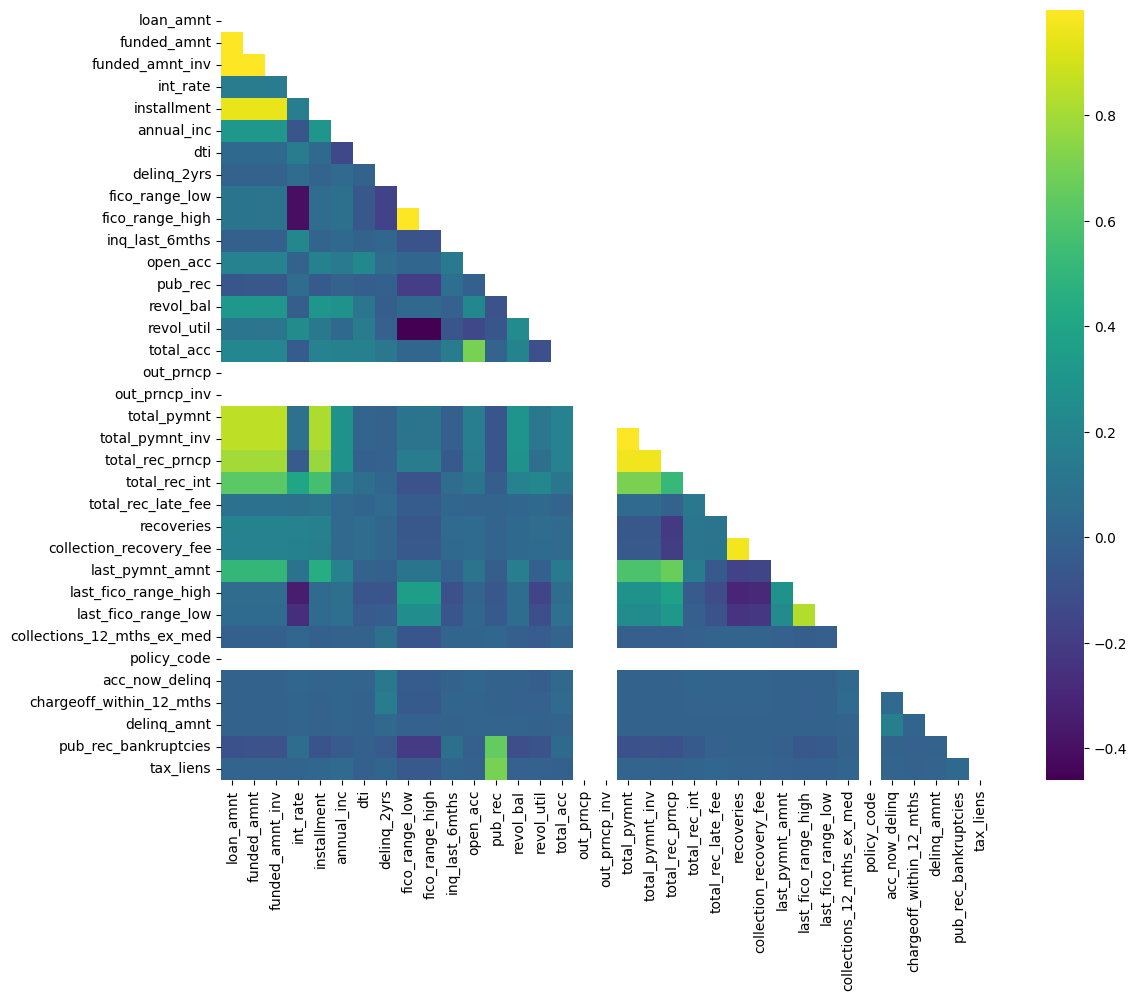

In [26]:
# Correlação
plt.figure(figsize = (14,10))
mask = np.zeros_like(df_aprovado.corr()) # calcula o correlação
mask[np.triu_indices_from(mask)] = True # filtra
sns.heatmap(df_aprovado.corr(), cmap = 'viridis', mask = mask, annot = False, square = True)

Existem 3 colunas com um comportamento diferente visível: 
**out_prncp, out_prncp_inv and policy_code.**

As variaveis são valores constantes, pode ter sido algum erro ou um código

In [27]:
print(df_aprovado.out_prncp.value_counts())
print(df_aprovado.out_prncp_inv.value_counts())
print(df_aprovado.policy_code.value_counts())

0.0    1341026
Name: out_prncp, dtype: int64
0.0    1341026
Name: out_prncp_inv, dtype: int64
1.0    1341026
Name: policy_code, dtype: int64


Estas são colunas com valores constantes. Nós podemos removê-las também.

In [28]:
# Drop das colunas
cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_aprovado = df_aprovado.drop(columns = cols_to_drop)

In [29]:
# Shappe
df_aprovado.shape

(1341026, 53)

<Axes: >

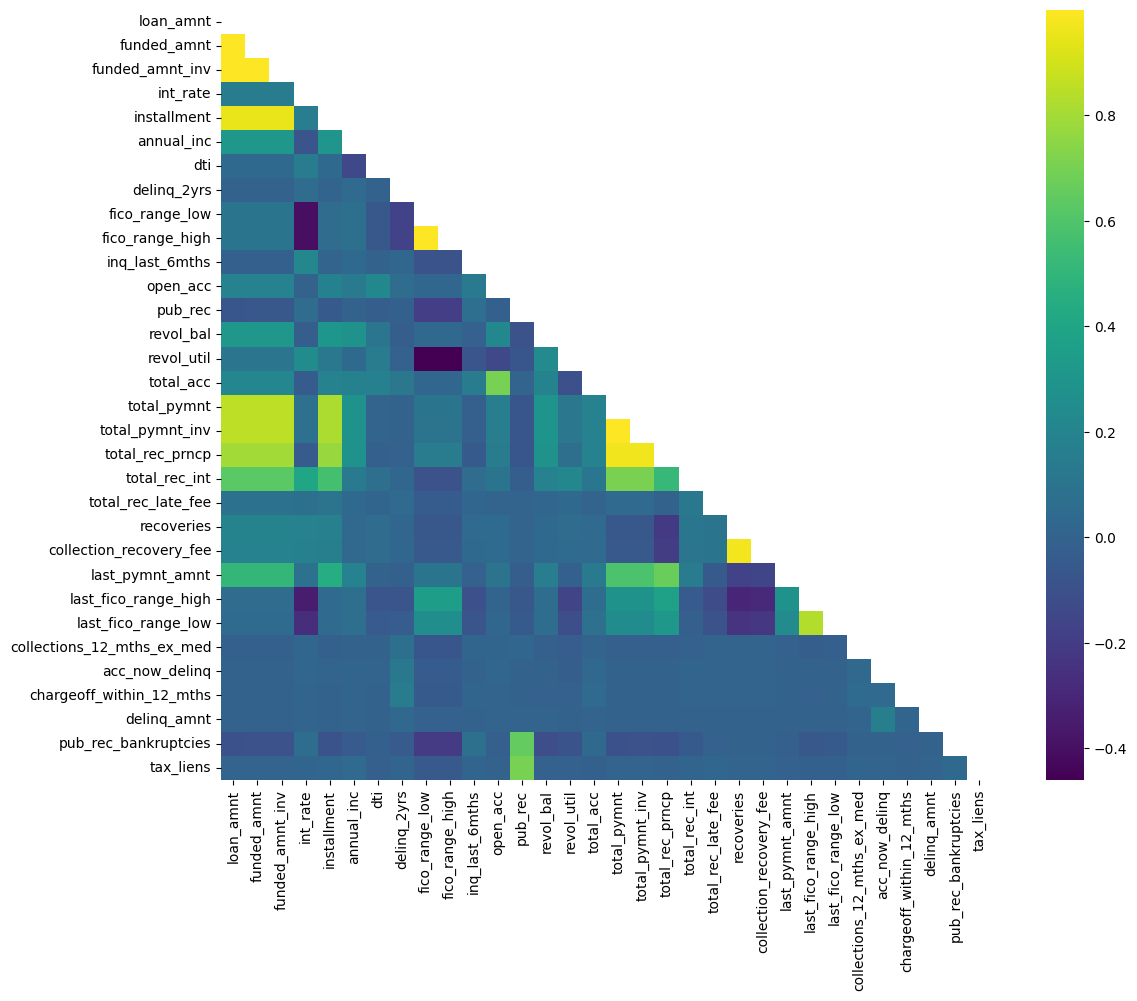

In [30]:
# Correlação
plt.figure(figsize = (14,10))
mask = np.zeros_like(df_aprovado.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_aprovado.corr(), cmap = 'viridis', mask = mask, annot = False, square = True)

Existem muitos quadrados amarelados. Isso indica uma correlação quase perfeita entre muitas variáveis. Vamos aprofundar:

In [31]:
# Vamos detalhar a correlação para verificar os pares de correlação mais altos
# decidindo qual variavel remover

# Pares
c = df_aprovado.corr().abs() #calcula correlação
unstack_corr = c.unstack() #desempilhar os dados, dados flat
pairs = unstack_corr.sort_values(ascending = False)

# Correlação
corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['atributo1', 'atributo2', 'corr']

# Verifica os pares de recursos acima de 0,8 na correlação
cond1 = (corr_pairs.atributo1 != corr_pairs.atributo2)
cond2 = (corr_pairs['corr'] > 0.80)
corr_pairs[cond1 & cond2]

,atributo1,atributo2,corr
1,fico_range_low,fico_range_high,1.000000
2,funded_amnt,loan_amnt,0.999565
3,total_pymnt_inv,total_pymnt,0.999541
4,funded_amnt_inv,funded_amnt,0.999439
5,funded_amnt_inv,loan_amnt,0.998918
6,recoveries,collection_recovery_fee,0.972674
7,total_pymnt,total_rec_prncp,0.967104
8,total_rec_prncp,total_pymnt_inv,0.966725
9,funded_amnt,installment,0.954037
10,installment,funded_amnt_inv,0.953445


Na tabela acima mtas variaveis tem correlação mto alta.

Vamos criar um gráfico de dispersão e verificar visualmente algumas relações entre esses atributos:

<Axes: xlabel='fico_range_low', ylabel='fico_range_high'>

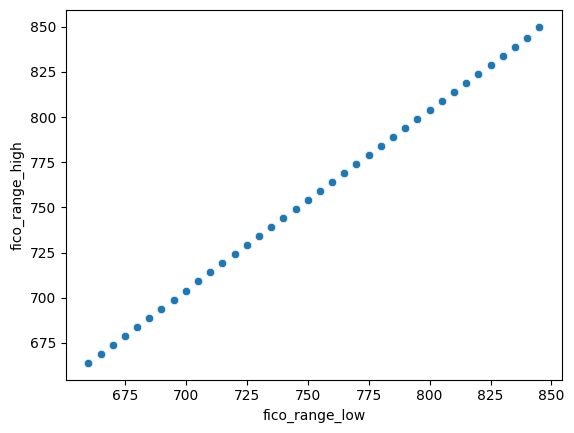

In [32]:
sns.scatterplot(x = df_aprovado.fico_range_low, y = df_aprovado.fico_range_high)

<Axes: xlabel='funded_amnt', ylabel='loan_amnt'>

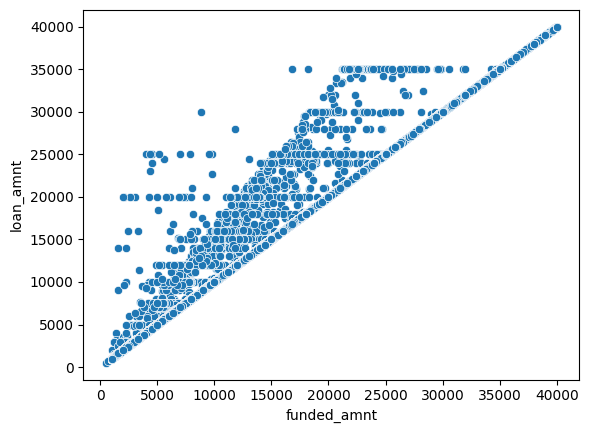

In [33]:
sns.scatterplot(x = df_aprovado.funded_amnt, y = df_aprovado.loan_amnt)

<Axes: xlabel='funded_amnt', ylabel='funded_amnt_inv'>

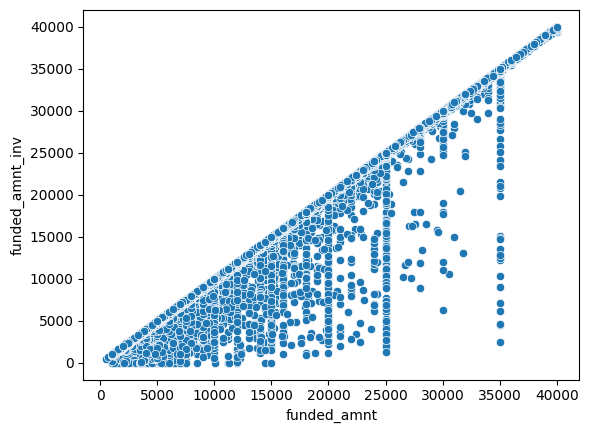

In [34]:
sns.scatterplot(x = df_aprovado.funded_amnt, y = df_aprovado.funded_amnt_inv)

<Axes: xlabel='total_pymnt', ylabel='installment'>

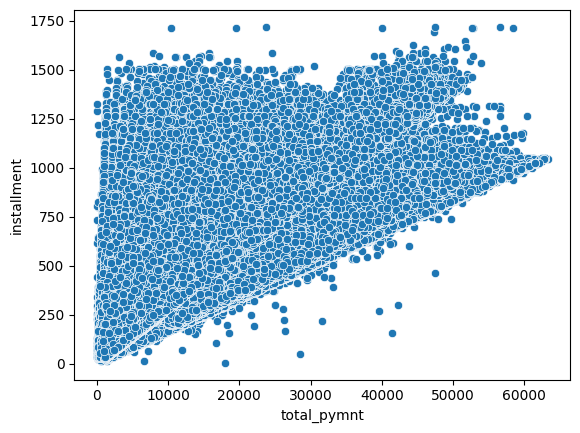

In [35]:
sns.scatterplot(x = df_aprovado.total_pymnt, y = df_aprovado.installment)

Parece que temos muitas informações "duplicadas". Vamos eliminar algumas colunas, com base na inspeção visual no dataframe corr_pairs:

In [36]:
# Drop de colunas
cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 
                'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_aprovado = df_aprovado.drop(columns = cols_to_drop)

In [37]:
# Shape
df_aprovado.shape

(1341026, 44)

Como nossa coluna de destino é categórica (loan_status), vamos criar um novo recurso - loan_paid - que é 1 para 'Fully Paid' e 0 para 'Charged Off'.

In [38]:
# vamos transformar a variavel em categorica
# Encoding
values = df_aprovado.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

In [39]:
# Nova coluna
df_aprovado['loan_paid'] = df_aprovado['loan_status'].map(d)
df_aprovado = df_aprovado.drop(columns=['loan_status'])

<Axes: >

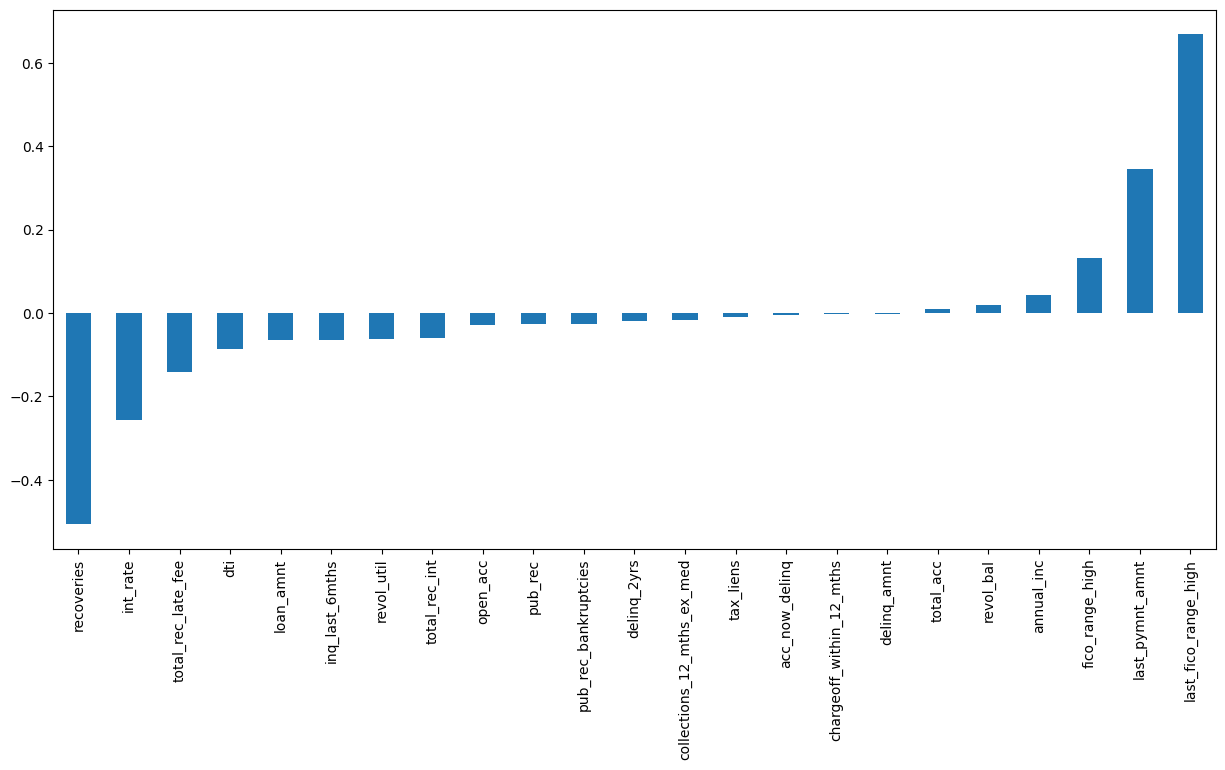

In [40]:
# Verificando a correlação de recursos com a nova coluna loan_paid
plt.figure(figsize = (15,7))
new_corr = df_aprovado.corr().iloc[:-1,-1].sort_values()
new_corr.plot.bar(rot=90)

### <font color='darkred'> Tratamento de Variáveis Categóricas Constantes </font>

Pré processamento e engenharia de Atributos - Ainda temos muitas colunas categóricas - object. 
Machine Learning se resume a matemática, não pode entregar ao modelo variavel categórica.

In [41]:
# Info
df_aprovado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341026 entries, 0 to 2260697
Data columns (total 44 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1341026 non-null  object 
 1   loan_amnt                   1341026 non-null  float64
 2   term                        1341026 non-null  object 
 3   int_rate                    1341026 non-null  float64
 4   grade                       1341026 non-null  object 
 5   sub_grade                   1341026 non-null  object 
 6   home_ownership              1341026 non-null  object 
 7   annual_inc                  1341026 non-null  float64
 8   verification_status         1341026 non-null  object 
 9   issue_d                     1341026 non-null  object 
 10  pymnt_plan                  1341026 non-null  object 
 11  url                         1341026 non-null  object 
 12  purpose                     1341026 non-null  object 
 1

In [42]:
# Visualiza os dados
df_aprovado.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1


In [43]:
# Listamos as variáveis categóricas (do tipo object)
# Todas serão tratadas
cat_cols = df_aprovado.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['id', 'term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [44]:
# Filtramos o  dataframe pelas variáveis categóricas
df_aprovado[cat_cols]

,id,term,grade,sub_grade,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,36 months,C,C4,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,190xx,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,68355089,36 months,C,C1,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,577xx,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,68341763,60 months,B,B4,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,605xx,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N
4,68476807,60 months,F,F1,MORTGAGE,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,174xx,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,N,Cash,N
5,68426831,36 months,C,C3,RENT,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,300xx,GA,Oct-1987,w,May-2017,May-2017,Individual,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,60 months,B,B2,OWN,Not Verified,Oct-2016,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,775xx,TX,Jul-2004,f,Aug-2018,Mar-2019,Individual,N,Cash,N
2260690,88948836,60 months,C,C3,MORTGAGE,Not Verified,Oct-2016,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,900xx,CA,Mar-2002,f,Jul-2018,Jul-2018,Individual,N,Cash,N
2260691,89996426,60 months,C,C4,MORTGAGE,Source Verified,Oct-2016,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,863xx,AZ,Jun-2011,f,Mar-2017,Dec-2018,Individual,N,Cash,N
2260692,90006534,60 months,C,C1,RENT,Not Verified,Oct-2016,n,https://lendingclub.com/browse/loanDetail.acti...,medical,284xx,NC,Aug-1997,f,Mar-2018,Mar-2019,Individual,N,Cash,N


In [45]:
# Essas são variaveis categoricas tb constantes, o valor N e n aparecem em todos so registros
print(df_aprovado.pymnt_plan.value_counts())
print(df_aprovado.hardship_flag.value_counts())

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


In [46]:
# Drop de colunas constantes e do id que deve ser dropado pra treinar o modelo.
# Pode voltar o id depois se quiser, mas pro treino não pode ficar
cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_aprovado = df_aprovado.drop(columns = cols_to_drop)

In [47]:
# Shape
df_aprovado.shape

(1341026, 41)

In [48]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


### <font color='darkgreen'> Engenharia de Atributos - Variável "term" - tempo de pagto do empréstimo </font>

In [49]:
print(df_aprovado.term.value_counts())

 36 months    1017398
 60 months     323628
Name: term, dtype: int64


In [50]:
# Converte a variável term em um tipo de dados numéricos de valor 36 ou 60 
l1 = df_aprovado.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))
df_aprovado['term'] = df_aprovado['term'].map(d)

In [51]:
df_aprovado['term']

0          36
1          36
2          60
4          60
5          36
           ..
2260688    60
2260690    60
2260691    60
2260692    60
2260697    60
Name: term, Length: 1341026, dtype: int64

In [52]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


### <font color='darkgreen'> Engenharia de Atributos - Variável "grade" e "sub_grade" </font>

In [53]:
print(df_aprovado.grade.value_counts())
print(df_aprovado.sub_grade.value_counts())

B    391850
C    380490
A    234657
D    200019
E     93126
F     31854
G      9030
Name: grade, dtype: int64
C1    85247
B4    83003
B5    82327
B3    81658
C2    78960
C3    74781
C4    74173
B2    73870
B1    70992
C5    67329
A5    63892
A4    52135
D1    51092
D2    44637
A1    43634
D3    39134
A3    37900
A2    37096
D4    35412
D5    29744
E1    23657
E2    21244
E3    18279
E4    15621
E5    14325
F1     9914
F2     7149
F3     6055
F4     4826
F5     3910
G1     2967
G2     2109
G3     1600
G4     1259
G5     1095
Name: sub_grade, dtype: int64


<Axes: xlabel='grade', ylabel='count'>

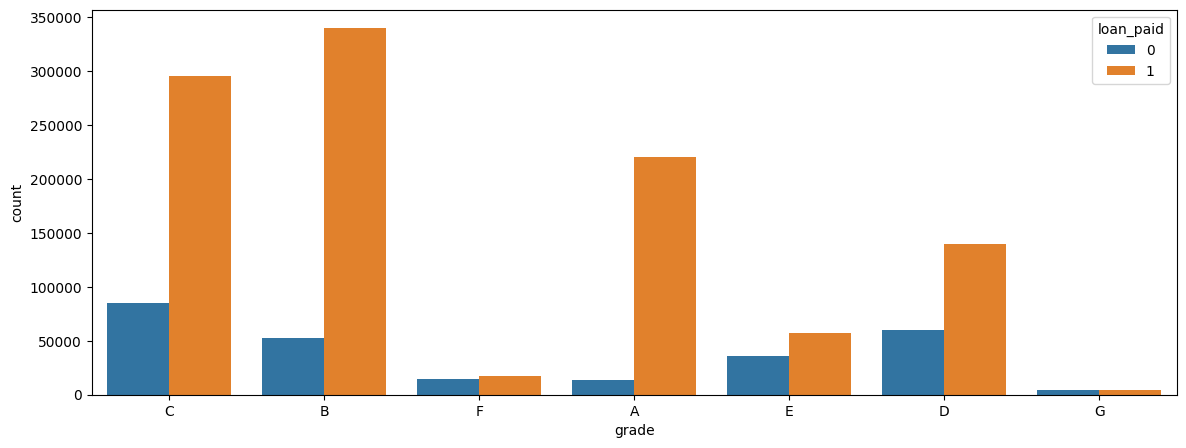

In [54]:
# Plot para contagem da variável target pela variável grade
# colocando a varivel grade em função da variavel target(loan_paid) que definimos no inicio
plt.figure(figsize = (14,5))
sns.countplot(x = df_aprovado.grade, hue = df_aprovado.loan_paid)

<Axes: xlabel='sub_grade', ylabel='count'>

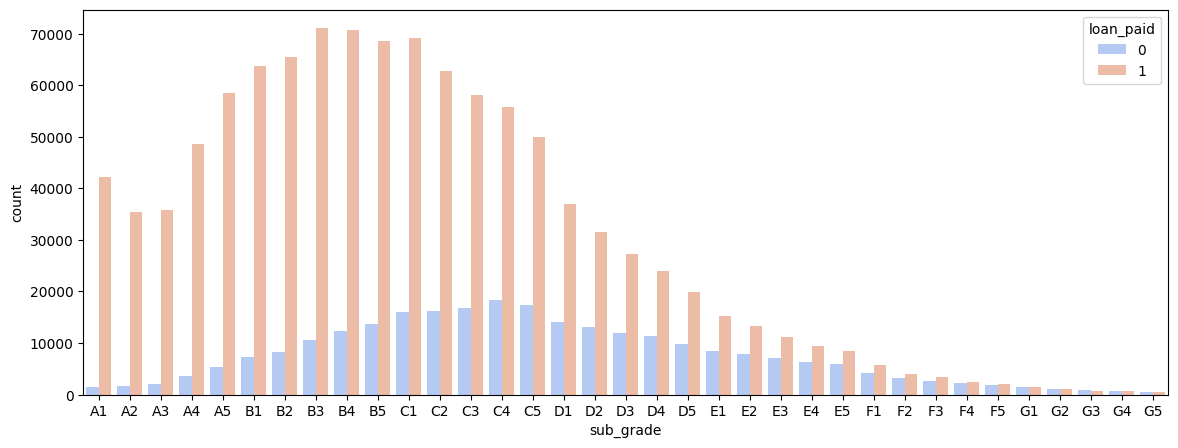

In [55]:
# Plot para contagem da variável target pela variável sub_grade
# Vemos que variavel grade ép arte da subgrade, vamos remover a mais simples a variavel "grade"
l = list(df_aprovado.sub_grade.unique())
l.sort()
plt.figure(figsize = (14,5))
sns.countplot(x = df_aprovado.sub_grade, order = l, hue = df_aprovado.loan_paid, palette = 'coolwarm')

In [56]:
# Visto que a variável grade é parte de sub_grade, então vamos deixar de lado o recurso de grade.
df_aprovado = df_aprovado.drop(columns = 'grade')

#### E então criamos variáveis dummy para cada catagoria da variavel subgrade.

Existe tb label encoding - mais 1 tecnica pra convertes variavel categórica em numerica.
Mas optamos por dummies

Cria uma coluna para cada categoria da variavel categorica, qdo o registro corresponder ao valor da coluna, preenche com 1, senao preenche com 0

In [57]:
# Cria variáveis dummy
# usa a fç get_dummies e cria uma coluna prcada valor q a variavel tratada assume
df_aprovado = pd.get_dummies(df_aprovado, columns = ['sub_grade'], prefix = '', prefix_sep = '', drop_first = True)

In [58]:
# Visualiza os dados
df_aprovado.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,verification_status,issue_d,url,purpose,zip_code,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,3600.0,36,13.99,MORTGAGE,55000.0,Not Verified,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,190xx,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,36,11.99,MORTGAGE,65000.0,Not Verified,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,small_business,577xx,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,60,10.78,MORTGAGE,63000.0,Not Verified,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,605xx,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,60,22.45,MORTGAGE,104433.0,Source Verified,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,174xx,...,1,0,0,0,0,0,0,0,0,0
5,11950.0,36,13.44,RENT,34000.0,Source Verified,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,300xx,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


### <font color='darkgreen'> Engenharia de Atributos - Variáveis "verification_status", "application_type", "initial_list_status", "purpose" </font>

In [60]:
# sempre imprime os valores unicos, pra entender como estão organizadas
print(df_aprovado.verification_status.unique())
print(df_aprovado.application_type.unique())
print(df_aprovado.initial_list_status.unique())
print(df_aprovado.purpose.unique())

['Not Verified' 'Source Verified' 'Verified']
['Individual' 'Joint App']
['w' 'f']
['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']


Para essas colunas, vamos apenas criar variáveis fictícias (dummy), concatená-las com o dataframe original e eliminar o original.

Usamos dummies novamente, mas tb poderia usar label enconding

In [61]:
# Cria variáveis dummy
df_aprovado = pd.get_dummies(df_aprovado, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_aprovado = pd.get_dummies(df_aprovado, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_aprovado = pd.get_dummies(df_aprovado, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_aprovado = pd.get_dummies(df_aprovado, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

In [62]:
# Visualiza os dados
df_aprovado.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,issue_d,url,zip_code,addr_state,dti,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,3600.0,36,13.99,MORTGAGE,55000.0,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,190xx,PA,5.91,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,36,11.99,MORTGAGE,65000.0,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,577xx,SD,16.06,...,0,0,0,0,0,0,0,1,0,0
2,20000.0,60,10.78,MORTGAGE,63000.0,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,605xx,IL,10.78,...,1,0,0,0,0,0,0,0,0,0
4,10400.0,60,22.45,MORTGAGE,104433.0,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,174xx,PA,25.37,...,0,0,1,0,0,0,0,0,0,0
5,11950.0,36,13.44,RENT,34000.0,Dec-2015,https://lendingclub.com/browse/loanDetail.acti...,300xx,GA,10.20,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['home_ownership', 'issue_d', 'url', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


### <font color='darkgreen'> Engenharia de Atributos - Variável "home_ownership" </font>

- tipo de residencia do usuario que solicita o emprestimo

In [64]:
# Contagem por categoria
# tem que tratar o none
df_aprovado.home_ownership.value_counts()

MORTGAGE    663868
RENT        532493
OWN         144195
ANY            283
OTHER          142
NONE            45
Name: home_ownership, dtype: int64

In [65]:
# Substitui None por Any, poderia ser por other tb
df_aprovado['home_ownership'] = df_aprovado.home_ownership.replace('NONE', 'ANY')

In [66]:
# Cria variáveis dummy
df_aprovado = pd.get_dummies(df_aprovado, columns = ['home_ownership'], 
                             prefix = '', 
                             prefix_sep = '', 
                             drop_first = True)

In [67]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['issue_d', 'url', 'zip_code', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


### <font color='darkgreen'> Engenharia de Atributos - Variáveis "issue_d", "url, last_pymnt_d" e "last_credit_pull_d" </font>

In [68]:
# Vendo se a coluna tem informação relevante, parece um erro no caso da coluna issue_d
df_aprovado.issue_d.head(10)

0     Dec-2015
1     Dec-2015
2     Dec-2015
4     Dec-2015
5     Dec-2015
6     Dec-2015
7     Dec-2015
8     Dec-2015
9     Dec-2015
12    Dec-2015
Name: issue_d, dtype: object

In [69]:
# Vamos apenas dropar as variáveis, pois o valor parece ser constante
df_aprovado = df_aprovado.drop(columns = ['issue_d', 'url', 'last_pymnt_d', 'last_credit_pull_d'])

### <font color='darkgreen'> Engenharia de Atributos - Variáveis "zip_code" e "addr_state" </font>

In [70]:
# muitos registros no mesmo CEP mascarado
# Tb não parece informação relevante
df_aprovado.zip_code.value_counts()

945xx    14964
750xx    14440
112xx    13781
606xx    12407
300xx    12087
         ...  
269xx        1
009xx        1
849xx        1
513xx        1
525xx        1
Name: zip_code, Length: 943, dtype: int64

In [71]:
# Não parece ser informação relevante, vamos dropar as colunas
df_aprovado = df_aprovado.drop(columns = ['zip_code', 'addr_state'])

In [72]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['earliest_cr_line', 'disbursement_method', 'debt_settlement_flag'], dtype='object')


### <font color='darkgreen'> Engenharia de Atributos - Variáveis "disbursement_method" e "debt_settlement_flag" </font>

In [73]:
# Metodo de desembolso parece relevante - vamos converter para dummy
print(df_aprovado.disbursement_method.value_counts())
print(df_aprovado.debt_settlement_flag.value_counts())

Cash         1334162
DirectPay       6864
Name: disbursement_method, dtype: int64
N    1307844
Y      33182
Name: debt_settlement_flag, dtype: int64


In [74]:
# Cria variáveis dummy
df_aprovado = pd.get_dummies(df_aprovado, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_aprovado = pd.get_dummies(df_aprovado, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)

### <font color='darkgreen'> Engenharia de Atributos - Variáveis "earliest_cr_line" </font>

In [75]:
# observe que temos anos bem distantes na variavel linhas de credito
print(df_aprovado.earliest_cr_line.value_counts())

Aug-2001    9365
Aug-2002    9066
Sep-2003    9000
Oct-2001    8838
Aug-2000    8822
            ... 
Sep-1953       1
May-1961       1
Jun-1955       1
Aug-1955       1
Dec-1951       1
Name: earliest_cr_line, Length: 739, dtype: int64


In [76]:
# Drop da coluna pois não parece ser relevante
df_aprovado = df_aprovado.drop(columns = ['earliest_cr_line'])

In [77]:
# Variáveis categóricas restantes
cat_cols = df_aprovado.select_dtypes(include=['object']).columns
print(cat_cols)

Index([], dtype='object')


In [78]:
# Info
# Agora temos tudo como dados do tipo numerico e podemos usar os modelos
df_aprovado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341026 entries, 0 to 2260697
Data columns (total 82 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   dti                         1341026 non-null  float64
 5   delinq_2yrs                 1341026 non-null  float64
 6   fico_range_high             1341026 non-null  float64
 7   inq_last_6mths              1341026 non-null  float64
 8   open_acc                    1341026 non-null  float64
 9   pub_rec                     1341026 non-null  float64
 10  revol_bal                   1341026 non-null  float64
 11  revol_util                  1341026 non-null  float64
 12  total_acc                   1341026 non-null  float64
 1

### <font color='darkred'> Modelagem Preditiva </font>

In [79]:
# Começamos separando as variáveis X (entrada) e y (saída)
# Filtra todas as variaveis que forem diferentes da vairavel alvo - "loan_paid" e coloca na variavel explicativa
# Cria uma cópia do df_aprovado
df = df_aprovado.copy()
X = df.loc[:, df.columns != 'loan_paid'].values
y = df.loan_paid.values

In [80]:
# Divisão em dados de treino e teste com proporção 80/20
# Usamos a fç train_tes_split do sklearn, na proporção 80% treino e 20% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
# Visualiza os dados
# observe que os dados estão em escalas diferentes, alguns em milhar, outros dezenas, precisa padronizar
df_aprovado.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,OTHER,OWN,RENT,DirectPay,Y
0,3600.0,36,13.99,55000.0,5.91,0.0,679.0,1.0,7.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,24700.0,36,11.99,65000.0,16.06,1.0,719.0,4.0,22.0,0.0,...,0,1,0,0,1,0,0,0,0,0
2,20000.0,60,10.78,63000.0,10.78,0.0,699.0,0.0,6.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,10400.0,60,22.45,104433.0,25.37,1.0,699.0,3.0,12.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,11950.0,36,13.44,34000.0,10.20,0.0,694.0,0.0,5.0,0.0,...,0,0,0,0,0,0,0,1,0,0


Precisamos padronizar os dados e colocá-los na mesma escala, pois é como o algoritmo espera receber

In [82]:
# Cria o objeto scaler do sklearn
scaler = MinMaxScaler()

In [83]:
# Fit e transform em treino
# Fit treina o scaler,que é o objeto de padronização, so usa nos dados de treino
X_treino = scaler.fit_transform(X_treino)

# Somente transform em teste
X_teste = scaler.transform(X_teste)

In [84]:
print(X_treino.shape)
print(X_teste.shape)

(1072820, 81)
(268206, 81)


### <font color='darkred'> Construção do Modelo </font>

e-Book da Data Science Academy : 
www.deeplearningbook.com.br

Esse código é a criação de uma rede neural sequencial usando o Keras, uma biblioteca de alto nível em TensorFlow. Vou explicar cada parte:

**1. Estrutura do Modelo:**

O modelo usa a API Sequential, que é uma forma simples de empilhar camadas, uma após a outra. modelo = Sequential()


**2. Adição das Camadas Dense:**

Cada linha modelo.add(Dense(...)) adiciona uma nova camada totalmente conectada (densa) à rede. Aqui está o que cada parâmetro significa:

- units: Define o número de neurônios na camada.

- activation: Define a função de ativação para os neurônios da camada. Aqui, o modelo usa ReLU (Rectified Linear Unit) para as camadas ocultas e sigmoid para a camada de saída.


> Explicando cada camada:

1ª Camada: 78 neurônios com ativação ReLU.

2ª Camada: 39 neurônios com ativação ReLU.

3ª Camada: 19 neurônios com ativação ReLU.

4ª Camada: 8 neurônios com ativação ReLU.

5ª Camada: 4 neurônios com ativação ReLU.

6ª Camada (Saída): 1 neurônio com ativação sigmoid.


**3. Funções de Ativação:**

ReLU: É usada nas camadas ocultas para introduzir não-linearidade e resolver problemas de gradiente.
Sigmoid: A última camada usa sigmoid porque o objetivo do modelo é provavelmente uma tarefa de classificação binária (saída entre 0 e 1).

**4. Finalidade do Modelo:**

Esse tipo de arquitetura é comum em problemas de classificação binária, especialmente em finanças, onde você pode estar tentando prever a probabilidade de um evento, como inadimplência ou outra variável binária.

In [85]:
# Modelo usando o Keras do Tensor Flow
# Vamos usar o algoritmo de Rede Neural Artificial
# units - nº de neuronios, hiperparâmetro do modelo
# como ativação usamos a função relu
# na ultima camada usa fç sigmoide, para o modelo retornar uma probabilidade na saída
modelo = Sequential() # cria o objeto sequencial
modelo.add(Dense(units = 78, activation = 'relu')) #adiciona camadas densas, camadas conectadas
modelo.add(Dense(units = 39, activation = 'relu'))
modelo.add(Dense(units = 19, activation = 'relu'))
modelo.add(Dense(units = 8, activation = 'relu'))
modelo.add(Dense(units = 4, activation = 'relu'))
modelo.add(Dense(units = 1, activation = 'sigmoid'))

In [86]:
# Compilação do modelo
# Utilizamos o otimizador Adam, que contem a descida do gradiente, metodo de treino RNA Redes Neurais Artificiais
# Como fç de perda usada em modelos de classificação, binary_crossentropy
# Como métrica a acurácia
modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
# Treinamento do modelo
# Usou o Batch em cada passada entrega ao modelo amostras de dados e cabem melhor na melhora
# a quantidade de epocas tem que testar, tomar cuidado com overfitting, olhar a acuracia dos dados de treino e teste
# se forem mtos diferentes tem que analisar se o modelo aprendeu o padrao dos dados e não a generalização.
modelo.fit(x = X_treino, 
           y = y_treino, 
           epochs = 40, #40 passadas
           batch_size = 512, # é bom usar porque se não cada passada ele coloca na memoria do compt
           validation_data = (X_teste, y_teste), 
           verbose = 1)

Epoch 1/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9063 - loss: 0.2249 - val_accuracy: 0.9674 - val_loss: 0.0827
Epoch 2/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9682 - loss: 0.0813 - val_accuracy: 0.9725 - val_loss: 0.0712
Epoch 3/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9725 - loss: 0.0713 - val_accuracy: 0.9749 - val_loss: 0.0663
Epoch 4/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9747 - loss: 0.0659 - val_accuracy: 0.9767 - val_loss: 0.0619
Epoch 5/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9760 - loss: 0.0636 - val_accuracy: 0.9782 - val_loss: 0.0588
Epoch 6/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9780 - loss: 0.0594 - val_accuracy: 0.9791 - val_loss: 0.0573
Epoch 7/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9790 - loss: 0.0572 - val_accuracy: 0.9792 - val_loss: 0.0561
Epoch 8/40
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0546 - 

In [88]:
# Sumário
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 78)                  │           6,396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 39)                  │           3,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,316 (122.33 KB)

 Trainable params: 10,438 (40.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,878 (81.56 KB)

### <font color='darkred'> Avaliação do Modelo </font>

Objetivo da avaliação é testar a performance do modelo de aprendizado de maquina, durante o treinamento ou depois do treinamento, mas entrega ao modelo dados que ele não viu.
Não pode entregar ao modelo durante avaliação os dados de treino, porque esses ele usou para aprender.

In [89]:
# dados de validação, que usamos para testar o modelo durante o treino, dados desconhecidos
# Erros do modelo
losses = pd.DataFrame(modelo.history.history)

<Axes: >

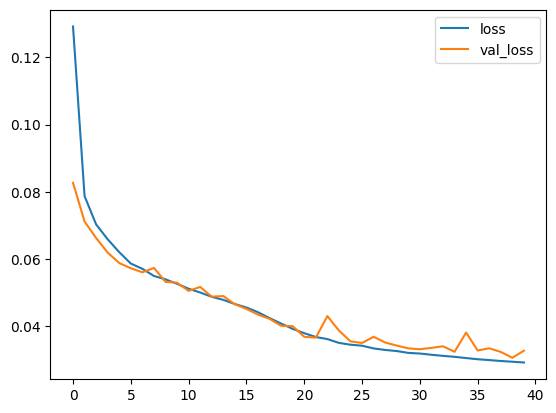

In [90]:
# Plot do erro
# o erro começa alto e vai caindo, indicando que o modelo está aprendendo
# linha azul erro em treino, laranja erro em validação, quereos comportamento parecidos. esta ok!
losses[['loss','val_loss']].plot()

<Axes: >

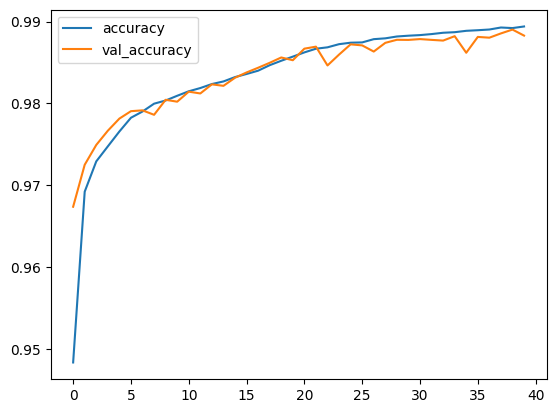

In [91]:
# Plot da acurácia
# acuracia começa baixo e vai subindo conforme o modelo vai aprendendo
losses[['accuracy','val_accuracy']].plot()

In [92]:
# Previsões
# 0.5 é para o modelo entregar o resultado como classe 0 ou 1, se a saida for maior que 50%, ele responde 1
# Na saida do modelo usamos uma função sigmoide que entrega a previsão do modelo como uma probabilidade
# Converte para 1 e depois converte para int32, pra ficar como inteiro ou 0, não pagou o emprestimo.
# Pra avalização do modelo precisa da classe 0 ou 1
previsoes = (modelo.predict(X_teste) > 0.5).astype("int32")

8382/8382 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [93]:
# conseguimos .99 de acurácia e precision tb com otima entrega
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     53089
           1       0.99      0.99      0.99    215117

    accuracy                           0.99    268206
   macro avg       0.98      0.98      0.98    268206
weighted avg       0.99      0.99      0.99    268206



In [94]:
# Matriz de confusão
# a diagonal com valores menores foram os erros do modelo, era 0 e o modelo previu 1= 1753 e 1 previsto 0 = 1386
# a diagonal com valores maiores foram acertos!! :)
pd.DataFrame(confusion_matrix(y_teste, previsoes))

,0,1
0,51336,1753
1,1386,213731


### <font color='darkred'> Previsões com um Novo Usuário </font>

In [95]:
import random

df_aprovado = df_aprovado.reset_index(drop=True)

# pega dos dados gerados, para testar o modelo antes de usar dados reais
random.seed(101)
random_ind = random.randint(0,len(df_aprovado))

novo_usuario = df_aprovado.drop('loan_paid', axis = 1).iloc[random_ind]
novo_usuario

loan_amnt      29675.00
term              36.00
int_rate          10.99
annual_inc    125565.00
dti                7.67
                ...    
OTHER              0.00
OWN                0.00
RENT               0.00
DirectPay          0.00
Y                  0.00
Name: 1218764, Length: 81, dtype: float64

In [96]:
# Padroniza os dados do novo usuário
# padroniza, porque tem q usar dados como o modelo aprendeu, que foi padronizado!
# Aplica somente o transforme e nao o fit transform
novo_c = scaler.transform(novo_usuario.values.reshape(1,81))

In [97]:
print(f"Clube do Empréstimo - Previsão de Pagamento Para Novo Usuário (1 - vai pagar / 0 - não vai pagar)")
print(f"Previsão do Modelo Para Este Usuário: {(modelo.predict(novo_c) > 0.5).astype('int32')[0][0]}")

Clube do Empréstimo - Previsão de Pagamento Para Novo Usuário (1 - vai pagar / 0 - não vai pagar)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Previsão do Modelo Para Este Usuário: 1


In [98]:
# modelo acertou! Podemos conferir porque temos os resultados, agora devemos pegar dados reais de novos usuarios.
# Vamos verificar o status histórico desse usuário
df_aprovado.loc[random_ind, 'loan_paid']

1

### Camadas em redes neurais depende da natureza dos dados:


O uso de diferentes tipos de camadas em redes neurais depende da natureza dos dados. Vamos explorar o motivo pelo qual cada tipo de camada é mais adequado para determinados tipos de dados, como imagens ou matrizes, e quando usar camadas totalmente conectadas (como no exemplo nesse Notebook), convolucionais ou recorrentes.

> **1. Camadas Totalmente Conectadas (Dense Layers)**

Essas camadas, como as do seu exemplo, são chamadas de camadas densas (ou totalmente conectadas) porque cada neurônio está conectado a todos os neurônios da camada anterior. Elas são apropriadas quando estamos lidando com dados tabulares ou vetores de características — por exemplo, dados financeiros, como no seu caso, onde cada atributo é uma característica independente.

> Usos típicos:

- Dados tabulares (planilhas ou tabelas de dados).
- Problemas de classificação ou regressão onde os dados não têm uma estrutura espacial ou temporal.


> **2. Camadas Convolucionais (Convolutional Layers):**

As camadas convolucionais (como Conv2D em Keras) são especialmente úteis para dados com estrutura espacial, como imagens. Elas são projetadas para capturar padrões locais (como bordas, texturas e formas) e aprender características hierárquicas — ou seja, de detalhes simples para padrões mais complexos.

**Como funcionam:**

Cada filtro convolucional passa sobre a imagem, extraindo informações locais. Isso é feito aplicando operações de convolução sobre pequenas regiões da imagem.
Camadas convolucionais reduzem a necessidade de conexões, pois cada neurônio é conectado apenas a uma pequena região da camada anterior (em vez de todos os neurônios).

Com o aumento das camadas convolucionais, o modelo aprende características mais complexas e de alto nível.


**Usos típicos:**

- Imagens: Detecção de objetos, reconhecimento facial, classificação de imagens.
- Dados com estrutura espacial em 2D (imagem) ou 3D (vídeo).


> **3. Camadas Recorrentes (Recurrent Layers):

As camadas recorrentes (como LSTM ou GRU em Keras) são projetadas para dados sequenciais ou temporais — isto é, dados onde a ordem importa. Ao contrário das camadas densas e convolucionais, que processam todos os dados de uma vez, as camadas recorrentes memorizam informações anteriores para entender a sequência.

**Como funcionam:**

Cada neurônio de uma camada recorrente recebe não apenas a entrada atual, mas também uma "memória" das entradas anteriores. Isso é útil para captar padrões ao longo do tempo.
Em LSTM (Long Short-Term Memory) e GRU (Gated Recurrent Unit), há mecanismos que ajudam a "esquecer" ou "lembrar" informações importantes ao longo da sequência.

**Usos típicos:**

- Séries temporais: Previsão de preços, previsão de demanda, análise de vendas ao longo do tempo.
- Processamento de linguagem natural (NLP): Tradução automática, análise de sentimento, modelagem de linguagem.
- Dados sequenciais em geral: Qualquer dado onde a sequência dos eventos importa.


> **Quando Escolher Cada Tipo de Camada?**

**Camadas Densas:** Quando você tem dados tabulares ou vetores de características. As relações entre as características não seguem uma estrutura espacial ou temporal específica.

**Camadas Convolucionais:** Quando você trabalha com dados que possuem uma estrutura espacial fixa, como pixels em uma imagem, e precisa extrair padrões locais.

**Camadas Recorrentes:** Quando seus dados são sequenciais (por exemplo, séries temporais ou texto) e você precisa de uma "memória" para captar padrões ao longo do tempo.

> **Exemplo Prático**

Para ilustrar a diferença, vamos pensar em três cenários:

**Classificação de Risco de Crédito (dados tabulares):**

Usaria camadas densas, como o exemplo que você tem, pois cada característica (idade, renda, histórico de crédito, etc.) é independente e não tem estrutura espacial ou temporal.

**Classificação de Imagens de Satélite (imagens):**

Usaria camadas convolucionais (Conv2D), pois os pixels da imagem formam um padrão espacial e queremos extrair características visuais, como bordas e formas.

**Previsão de Preço de Ações (séries temporais):**

Usaria camadas recorrentes (LSTM ou GRU), pois o preço das ações depende de uma sequência temporal e há padrões que se revelam ao longo do tempo.


> **Conclusão:**

As camadas em redes neurais são projetadas para capturar características específicas dos dados. Ao escolher o tipo certo de camada para o seu problema, você está permitindo que a rede neural extraia as informações mais relevantes dos dados, seja de forma espacial (convolucional), temporal (recorrente) ou tabular (densa).
